<a href="https://colab.research.google.com/github/Vishnu-2704/codeway-machine-learning/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/archive (4)/Churn_Modelling.csv')


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [ ]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=123)


In [ ]:
cv_accuracy = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cv_accuracy):.2f}')


Cross-Validation Accuracy: 0.86


In [ ]:
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=123)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')


Test Accuracy: 0.87


In [ ]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2395
           1       0.78      0.47      0.58       605

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[2315   80]
 [ 323  282]]


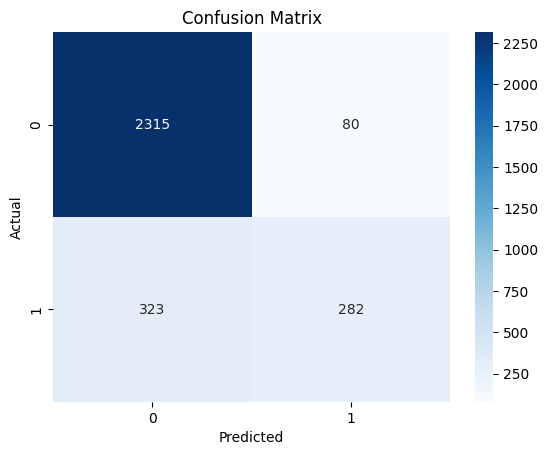

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# New Section